## The Age of Recommender Systems

The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play. Recommendation Systems are a type of information filtering systems as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.

They are used to predict the rating or preference that a user would give to an item. Almost every major tech company has applied them in some form or the other: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow. Moreover, companies like Amazon, Netflix and Spotify depend highly on the effectiveness of their recommendation engines for their business and sucees.

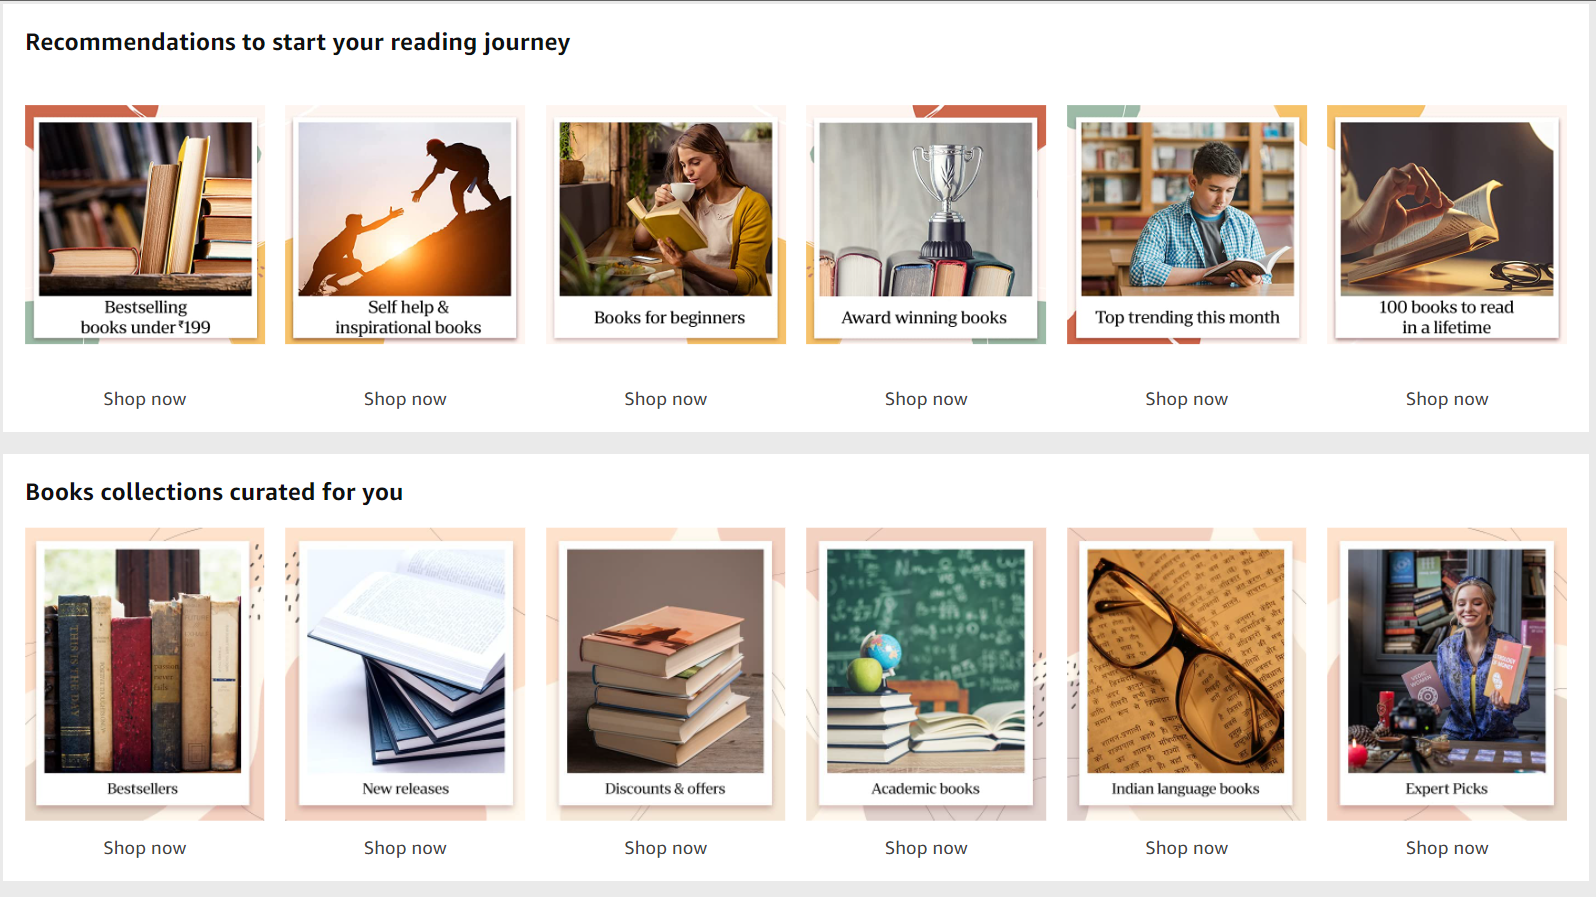

### There are basically three types of recommender systems:-

> *  **Demographic Filtering**- They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.

> *  **Content Based Filtering**- They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.

> *  **Collaborative Filtering**- This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.


In [1]:
!pip install nltk
!pip install dataprep

     ---------------------------------------- 9.9/9.9 MB 3.0 MB/s eta 0:00:00
     -------------------------------------- 327.1/327.1 kB 3.4 MB/s eta 0:00:00
     -------------------------------------- 133.6/133.6 kB 4.0 MB/s eta 0:00:00
     -------------------------------------- 158.6/158.6 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 273.3/273.3 kB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 96.9/96.9 kB ? eta 0:00:00
     ---------------------------------------- 1.8/1.8 MB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 44.7/44.7 kB 2.2 MB/s eta 0:00:00
     ------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.


In [2]:
#importing necessary libraries
import os
import re
import nltk
import requests
import warnings
import pandas as pd
import numpy as np
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD

from PIL import Image
warnings.filterwarnings('ignore')
from dataprep.eda import plot, plot_correlation, plot_missing, create_report

## Importing Dataset

In [3]:
books_df = pd.read_csv("C:\\Users\\avina\\Documents\\Data Science\\Projects\\P-186- Book Recommendation\\final_data.csv",encoding='latin-1')

In [4]:
books_df

userid                  location   age country        isbn  rating  \
0            8  timmins, ontario, canada  32.0  canada  074322678X       5   
1            8  timmins, ontario, canada  32.0  canada  080652121X       0   
2            8  timmins, ontario, canada  32.0  canada  1552041778       5   
3            8  timmins, ontario, canada  32.0  canada  1558746218       0   
4            8  timmins, ontario, canada  32.0  canada  1567407781       6   
...        ...                       ...   ...     ...         ...     ...   
196821  278851        dallas, texas, usa  33.0     usa  1558531025       8   
196822  278851        dallas, texas, usa  33.0     usa  1566910102       0   
196823  278851        dallas, texas, usa  33.0     usa  1569661057      10   
196824  278851        dallas, texas, usa  33.0     usa  1885071213       7   
196825  278854     portland, oregon, usa  32.0     usa  042516098X       7   

                                                    title  \
0                 Where You'll Find Me: And Other Stories   
1       Hitler's Secret Bankers: The Myth of Swiss Neu...   
2                                                Jane Doe   
3       A Second Chicken Soup for the Woman's Soul (Ch...   
4            The Witchfinder (Amos Walker Mystery Series)   
...                                                   ...   
196821  Life's Little Instruction Book (Life's Little ...   
196822              Oregon Handbook (The Americas Series)   
196823  Dallas Street Map Guide and Directory, 2000 Ed...   
196824  Highpoint Adventures, A Pocket Guide to the 50...   
196825                                      Hornet's Nest   

                           author  year                 publisher  \
0                     Ann Beattie  2002                  Scribner   
1                      Adam Lebor  2000             Citadel Press   
2                    R. J. Kaiser  1999                Mira Books   
3                   Jack Canfield  1998     Health Communications   
4               Loren D. Estleman  1998  Brilliance Audio - Trade   
...                           ...   ...                       ...   
196821           H. Jackson Brown  1991             Thomas Nelson   
196822              Stuart Warren  1995            Pub Group West   
196823                     Mapsco  1999  American Map Corporation   
196824             Charlie Winger  1999        Sequoia Publishing   
196825  Patricia Daniels Cornwell  1998  Berkley Publishing Group   

                                              image_url_m  
0       http://images.amazon.com/images/P/074322678X.0...  
1       http://images.amazon.com/images/P/080652121X.0...  
2       http://images.amazon.com/images/P/1552041778.0...  
3       http://images.amazon.com/images/P/1558746218.0...  
4       http://images.amazon.com/images/P/1567407781.0...  
...                                                   ...  
196821  http://images.amazon.com/images/P/1558531025.0...  
196822  http://images.amazon.com/images/P/1566910102.0...  
196823  http://images.amazon.com/images/P/1569661057.0...  
196824  http://images.amazon.com/images/P/1885071213.0...  
196825  http://images.amazon.com/images/P/042516098X.0...  

[196826 rows x 11 columns]

In [5]:
import re

books_df['title'] = books_df['title'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))

In [6]:
# explicit data
explicit=books_df[books_df['rating']!=0]
explicit=explicit.reset_index(drop=True)
print(explicit.shape)
explicit.head()

(80803, 11)


userid                  location   age country        isbn  rating  \
0       8  timmins, ontario, canada  32.0  canada  074322678X       5   
1       8  timmins, ontario, canada  32.0  canada  1552041778       5   
2       8  timmins, ontario, canada  32.0  canada  1567407781       6   
3       8  timmins, ontario, canada  32.0  canada  1575663937       6   
4       8  timmins, ontario, canada  32.0  canada  1881320189       7   

                                               title              author  \
0              Where Youll Find Me And Other Stories         Ann Beattie   
1                                           Jane Doe        R. J. Kaiser   
2         The Witchfinder Amos Walker Mystery Series   Loren D. Estleman   
3  More Cunning Than Man A Social History of Rats...  Robert Hendrickson   
4                      Goodbye to the Buttermilk Sky        Julia Oliver   

   year                    publisher  \
0  2002                     Scribner   
1  1999                   Mira Books   
2  1998     Brilliance Audio - Trade   
3  1999  Kensington Publishing Corp.   
4  1994               River City Pub   

                                         image_url_m  
0  http://images.amazon.com/images/P/074322678X.0...  
1  http://images.amazon.com/images/P/1552041778.0...  
2  http://images.amazon.com/images/P/1567407781.0...  
3  http://images.amazon.com/images/P/1575663937.0...  
4  http://images.amazon.com/images/P/1881320189.0...

In [7]:
# Implicit data
implicit=books_df[books_df['rating']==0]
implicit=implicit.reset_index(drop=True)
print(implicit.shape)
implicit.head()

(116023, 11)


userid                     location   age  country        isbn  rating  \
0       8     timmins, ontario, canada  32.0   canada  080652121X       0   
1       8     timmins, ontario, canada  32.0   canada  1558746218       0   
2      10   albacete, wisconsin, spain  26.0    spain  1841721522       0   
3      22  erfurt, thueringen, germany  32.0  germany  3442353866       0   
4      22  erfurt, thueringen, germany  32.0  germany  3442410665       0   

                                               title              author  \
0  Hitlers Secret Bankers The Myth of Swiss Neutr...          Adam Lebor   
1  A Second Chicken Soup for the Womans Soul Chic...       Jack Canfield   
2  New Vegetarian Bold and Beautiful Recipes for ...  Celia Brooks Brown   
3        Der Fluch der Kaiserin Ein Richter Di Roman      Eleanor Cooney   
4                                    Sturmzeit Roman      Charlotte Link   

   year                      publisher  \
0  2000                  Citadel Press   
1  1998          Health Communications   
2  2001  Ryland Peters &amp; Small Ltd   
3  2001                       Goldmann   
4  1991                       Goldmann   

                                         image_url_m  
0  http://images.amazon.com/images/P/080652121X.0...  
1  http://images.amazon.com/images/P/1558746218.0...  
2  http://images.amazon.com/images/P/1841721522.0...  
3  http://images.amazon.com/images/P/3442353866.0...  
4  http://images.amazon.com/images/P/3442410665.0...

## Recommendation System - Part I

### Product popularity based recommendation system targeted at new customers
Popularity based are a great strategy to target the new customers with the most popular products sold on a business's website and is very useful to cold start a recommendation engine.

### Popularity Based Recommender System

In [8]:
explicit.title.value_counts().reset_index()

index  title
0                                        A Painted House    363
1      Harry Potter and the Sorcerers Stone Harry Pot...    315
2                                 Snow Falling on Cedars    260
3                                               The Firm    210
4       Harry Potter and the Order of the Phoenix Book 5    207
...                                                  ...    ...
39961                                  The Cat Next Door      1
39962                                  To the manor born      1
39963        Carreteras secundarias Narrativas hispnicas      1
39964            A Willing Spirit Haunting Hearts Series      1
39965  Dallas Street Map Guide and Directory 2000 Edi...      1

[39966 rows x 2 columns]

In [9]:
ratings = pd.DataFrame(explicit.groupby('title')['rating'].mean())
ratings.rename({'rating':'avg_ratings'}, axis=1 , inplace =True)
ratings['num_ratings'] = pd.DataFrame(explicit.groupby('title')['rating'].count())
ratings.reset_index(inplace=True)
ratings

title  avg_ratings  \
0                                    A Nutshell handbook     6.000000   
1       Earth Prayers From around the World 365 Praye...     7.142857   
2       Final Fantasy Anthology Official Strategy Gui...    10.000000   
3       Flight of Fancy American Heiresses Zebra Ball...     8.000000   
4                                               Kolumnen     9.666667   
...                                                  ...          ...   
39961                                      thique en toc     8.000000   
39962                              together by christmas     7.000000   
39963                                    touch the flame    10.000000   
39964                     why Im like this  True Stories     7.833333   
39965                   y los 40 ladrones Coleccin Fbula     5.000000   

       num_ratings  
0                1  
1                7  
2                2  
3                1  
4                3  
...            ...  
39961            1  
39962            4  
39963            1  
39964            6  
39965            1  

[39966 rows x 3 columns]

In [10]:
popular_books = ratings[ratings['num_ratings']>=200].sort_values('avg_ratings', ascending=False)
popular_books.reset_index(inplace=True, drop=True)
popular_books

title  avg_ratings  num_ratings
0   Harry Potter and the Order of the Phoenix Book 5     9.038647          207
1  Harry Potter and the Sorcerers Stone Harry Pot...     8.936508          315
2                                           The Firm     7.804762          210
3                             Snow Falling on Cedars     7.803846          260
4                                    A Painted House     7.393939          363

In [11]:
popular_books.sort_values('num_ratings', ascending=False).head(25)

title  avg_ratings  num_ratings
4                                    A Painted House     7.393939          363
1  Harry Potter and the Sorcerers Stone Harry Pot...     8.936508          315
3                             Snow Falling on Cedars     7.803846          260
2                                           The Firm     7.804762          210
0   Harry Potter and the Order of the Phoenix Book 5     9.038647          207

In [12]:
twentyfive_popular_books = popular_books.merge(explicit, on='title').drop_duplicates('title').reset_index(drop=True)
twentyfive_popular_books = twentyfive_popular_books[['title','avg_ratings','num_ratings','author','publisher','image_url_m']]
twentyfive_popular_books.head(10)

title  avg_ratings  \
0   Harry Potter and the Order of the Phoenix Book 5     9.038647   
1  Harry Potter and the Sorcerers Stone Harry Pot...     8.936508   
2                                           The Firm     7.804762   
3                             Snow Falling on Cedars     7.803846   
4                                    A Painted House     7.393939   

   num_ratings          author                     publisher  \
0          207   J. K. Rowling                    Scholastic   
1          315   J. K. Rowling        Arthur A. Levine Books   
2          210    John Grisham  Bantam Dell Publishing Group   
3          260  David Guterson             Vintage Books USA   
4          363    John Grisham       Dell Publishing Company   

                                         image_url_m  
0  http://images.amazon.com/images/P/043935806X.0...  
1  http://images.amazon.com/images/P/059035342X.0...  
2  http://images.amazon.com/images/P/044021145X.0...  
3  http://images.amazon.com/images/P/067976402X.0...  
4  http://images.amazon.com/images/P/044023722X.0...

In [13]:
from PIL import Image
import requests

fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(20,20))
fig.suptitle('Our Best Selling Books', size = 42, fontweight='bold')
for i in range(len(twentyfive_popular_books['title'].iloc[:5].tolist())):
    url = twentyfive_popular_books.loc[twentyfive_popular_books['title'] == twentyfive_popular_books['title'].tolist()[i],'image_url_m'][:1].values[0]
    im = Image.open(requests.get(url, stream=True).raw)
    axs[0,i].imshow(im)
    axs[0,i].axis("off")
    axs[0,i].set_title('Rating: {}, \nAuthor: {}, \nPublisher: {}'\
                       .format(round(twentyfive_popular_books['avg_ratings'][i],1),\
                               twentyfive_popular_books['author'][i],\
                              twentyfive_popular_books['publisher'][i]),\
                        y=-0.20, color="black", fontsize=15, fontweight='bold', loc='left')
    fig.show()
for i in range(len(twentyfive_popular_books['title'].iloc[5:10].tolist())):
    url = twentyfive_popular_books.loc[twentyfive_popular_books['title'] == twentyfive_popular_books['title'].iloc[5:10].tolist()[i],'image_url_m'][:1].values[0]
    im = Image.open(requests.get(url, stream=True).raw)
    axs[1,i].imshow(im)
    axs[1,i].axis("off")
    axs[1,i].set_title('Rating: {}, \nAuthor: {}, \nPublisher: {}'\
                       .format(round(twentyfive_popular_books['avg_ratings'][i+5],1),\
                               twentyfive_popular_books['author'][i+5],\
                              twentyfive_popular_books['publisher'][i+5]),\
                        y=-0.20, color="black", fontsize=14, loc='left')
    fig.show()
for i in range(len(twentyfive_popular_books['title'].iloc[10:15].tolist())):
    url = twentyfive_popular_books.loc[twentyfive_popular_books['title'] == twentyfive_popular_books['title'].iloc[10:15].tolist()[i],'image_url_m'][:1].values[0]
    im = Image.open(requests.get(url, stream=True).raw)
    axs[1,i].imshow(im)
    axs[1,i].axis("off")
    axs[1,i].set_title('Rating: {}, \nAuthor: {}, \nPublisher: {}'\
                       .format(round(twentyfive_popular_books['avg_ratings'][i+5],1),\
                               twentyfive_popular_books['author'][i+5],\
                              twentyfive_popular_books['publisher'][i+5]),\
                        y=-0.20, color="black", fontsize=14, loc='left')
    fig.show()
for i in range(len(twentyfive_popular_books['title'].iloc[15:20].tolist())):
    url = twentyfive_popular_books.loc[twentyfive_popular_books['title'] == twentyfive_popular_books['title'].iloc[15:20].tolist()[i],'image_url_m'][:1].values[0]
    im = Image.open(requests.get(url, stream=True).raw)
    axs[1,i].imshow(im)
    axs[1,i].axis("off")
    axs[1,i].set_title('Rating: {}, \nAuthor: {}, \nPublisher: {}'\
                       .format(round(twentyfive_popular_books['avg_ratings'][i+5],1),\
                               twentyfive_popular_books['author'][i+5],\
                              twentyfive_popular_books['publisher'][i+5]),\
                        y=-0.20, color="black", fontsize=14, loc='left')
    fig.show()
for i in range(len(twentyfive_popular_books['title'].iloc[20:25].tolist())):
    url = twentyfive_popular_books.loc[twentyfive_popular_books['title'] == twentyfive_popular_books['title'].iloc[21:25].tolist()[i],'image_url_m'][:1].values[0]
    im = Image.open(requests.get(url, stream=True).raw)
    axs[1,i].imshow(im)
    axs[1,i].axis("off")
    axs[1,i].set_title('Rating: {}, \nAuthor: {}, \nPublisher: {}'\
                       .format(round(twentyfive_popular_books['avg_ratings'][i+5],1),\
                               twentyfive_popular_books['author'][i+5],\
                              twentyfive_popular_books['publisher'][i+5]),\
                        y=-0.20, color="black", fontsize=14, loc='left')
    fig.show()
fig.tight_layout(pad=2.0)
plt.show()

## Pre Proessing

### Data Cleaning

In [14]:
# Removing Users who have rated less than 50 Books
user_counts = pd.DataFrame(explicit.groupby('userid').count()['rating']).rename({'rating':'no_times_rated'}, axis=1).reset_index()
user_counts

userid  no_times_rated
0           8               5
1          12               1
2          22               1
3          64               1
4          69               1
...       ...             ...
26850  278832               3
26851  278843               4
26852  278844               1
26853  278851               4
26854  278854               1

[26855 rows x 2 columns]

In [15]:
final_books = pd.merge(explicit, user_counts, on='userid')
final_books.drop(columns = ['location','isbn',
                   'country','age',
                   'year'],axis=1,inplace = True) #remove useless cols
final_books.head()

userid  rating                                              title  \
0       8       5              Where Youll Find Me And Other Stories   
1       8       5                                           Jane Doe   
2       8       6         The Witchfinder Amos Walker Mystery Series   
3       8       6  More Cunning Than Man A Social History of Rats...   
4       8       7                      Goodbye to the Buttermilk Sky   

               author                    publisher  \
0         Ann Beattie                     Scribner   
1        R. J. Kaiser                   Mira Books   
2   Loren D. Estleman     Brilliance Audio - Trade   
3  Robert Hendrickson  Kensington Publishing Corp.   
4        Julia Oliver               River City Pub   

                                         image_url_m  no_times_rated  
0  http://images.amazon.com/images/P/074322678X.0...               5  
1  http://images.amazon.com/images/P/1552041778.0...               5  
2  http://images.amazon.com/images/P/1567407781.0...               5  
3  http://images.amazon.com/images/P/1575663937.0...               5  
4  http://images.amazon.com/images/P/1881320189.0...               5

In [16]:
final_books.userid.nunique()

26855

In [17]:
final_books = final_books[final_books['no_times_rated']>=10].reset_index(drop=True)
final_books

userid  rating                                              title  \
0         242      10                                   Kabale Und Liebe   
1         242       9                   Der illustrierte Mann Erzhlungen   
2         242      10                                   Der Knig in Gelb   
3         242       8                                     Fahrenheit 451   
4         242      10             Die Mars Chroniken Roman in Erzhlungen   
...       ...     ...                                                ...   
35767  278418       7                                      YESTERDAY SON   
35768  278418       4                                         Bad Dreams   
35769  278418       5                     The Balloon Man Crime Classics   
35770  278418       3  The Sleep Solution A 21Night Program to Better...   
35771  278418       5  In Search of Stones  A Pilgrimage of Faith Rea...   

                    author                        publisher  \
0                 Schiller  Philipp Reclam, Jun Verlag GmbH   
1             Ray Bradbury                         Diogenes   
2         Raymond Chandler                  Diogenes Verlag   
3             Ray Bradbury                  Distribooks Inc   
4             Ray Bradbury                  Diogenes Verlag   
...                    ...                              ...   
35767        A. C. Crispin                        Star Trek   
35768           Kim Newman                   Pub Group West   
35769  Charlotte Armstrong            Independent Pub Group   
35770           Nigel Ball                    Ulysses Press   
35771        M. Scott Peck          Time Warner Audio Major   

                                             image_url_m  no_times_rated  
0      http://images.amazon.com/images/P/3150000335.0...              21  
1      http://images.amazon.com/images/P/3257203659.0...              21  
2      http://images.amazon.com/images/P/3257207522.0...              21  
3      http://images.amazon.com/images/P/3257208626.0...              21  
4      http://images.amazon.com/images/P/3257208634.0...              21  
...                                                  ...             ...  
35767  http://images.amazon.com/images/P/067160550X.0...              13  
35768  http://images.amazon.com/images/P/088184781X.0...              13  
35769  http://images.amazon.com/images/P/155882068X.0...              13  
35770  http://images.amazon.com/images/P/1569751544.0...              13  
35771  http://images.amazon.com/images/P/1570423008.0...              13  

[35772 rows x 7 columns]

In [18]:
final_books.userid.nunique()

1427

In [19]:
final_books.sort_values('no_times_rated', ascending=False)

userid  rating                             title             author  \
2452    11676      10  Colour and Shape Double Delights          S. Novick   
1704    11676       8                  Le crime du golf    Agatha Christie   
1697    11676       8       Garfield Eats His Heart Out          Jim Davis   
1698    11676       8         Traveler Wildside Romance    Melanie Jackson   
1699    11676       9                      Trust No One  Christiane Heggan   
...       ...     ...                               ...                ...   
29560  223154       8                        Wolfpointe          Rick Buda   
29559  223154       5               Married for a Month      Susan Mallery   
29558  223154       8                 The Stone Diaries      Carol Shields   
29557  223154       8                   A Painted House       John Grisham   
8062    50859       8                  Peanuts Treasury  Charles M. Schulz   

                     publisher  \
2452           Southwood Books   
1704         Le Livre de Poche   
1697          Ballantine Books   
1698                Love Spell   
1699                      Mira   
...                        ...   
29560     Twilight Times Books   
29559             Pocket Books   
29558            Penguin Books   
29557  Dell Publishing Company   
8062           MetroBooks (NY)   

                                             image_url_m  no_times_rated  
2452   http://images.amazon.com/images/P/1903207495.0...            1821  
1704   http://images.amazon.com/images/P/2253009199.0...            1821  
1697   http://images.amazon.com/images/P/034530912X.0...            1821  
1698   http://images.amazon.com/images/P/050552533X.0...            1821  
1699   http://images.amazon.com/images/P/1551665360.0...            1821  
...                                                  ...             ...  
29560  http://images.amazon.com/images/P/1931201080.0...              10  
29559  http://images.amazon.com/images/P/074340596X.0...              10  
29558  http://images.amazon.com/images/P/014023313X.0...              10  
29557  http://images.amazon.com/images/P/044023722X.0...              10  
8062   http://images.amazon.com/images/P/1586630687.0...              10  

[35772 rows x 7 columns]

In [20]:
final_books.duplicated().sum()

0

In [21]:
final_books.isnull().sum()

userid            0
rating            0
title             0
author            0
publisher         0
image_url_m       0
no_times_rated    0
dtype: int64

### Removing Books with less than 50 number of User Ratings

In [22]:
final_book = final_books[final_books['no_times_rated'] >= 50]
final_book

userid  rating                                              title  \
319      3757       7          Fluir Flow Una Psicologia de La Felicidad   
320      3757       8                El caballero de la armadura oxidada   
321      3757       7        Cuentos Para Pensar  Stories To Think About   
322      3757       7  Robot Dreams Masterworks of Science Fiction an...   
323      3757       8                                    ContactoContact   
...       ...     ...                                                ...   
35238  272482       8                 Na ribeira de Deus Coleco Sculo XX   
35239  272482       8              Entre duas bandeiras Colecco Sculo XX   
35240  272482       8  Vocabulrio portugus de origem rabe Coleco Ling...   
35241  272482       7  Estrangeirismos na lngua portuguesa Coleco Lin...   
35242  272482       9  Timor timorense Com suas lnguas literaturas lu...   

                        author                      publisher  \
319    Mihaly Csikszentmihalyi               Editorial Kairos   
320              Robert Fisher                       Obelisco   
321                Jorge Bucay       Alfaguara/Santillana USA   
322               Isaac Asimov       Berkley Publishing Group   
323                 Carl Sagan                 Lectorum Pubns   
...                        ...                            ...   
35238        Teixeira de Sousa  PublicaÃ§Ãµes Europa-AmÃ©rica   
35239        Teixeira de Sousa  PublicaÃ§Ãµes Europa AmÃ©rica   
35240      JosÃ© Pedro Machado            Editorial NotÃ­cias   
35241      JosÃ© Pedro Machado            Editorial NotÃ­cias   
35242             Artur Marcos              EdiÃ§Ãµes Colibri   

                                             image_url_m  no_times_rated  
319    http://images.amazon.com/images/P/8472453723.0...              91  
320    http://images.amazon.com/images/P/8477204055.0...              91  
321    http://images.amazon.com/images/P/8479018682.0...              91  
322    http://images.amazon.com/images/P/042509345X.0...              91  
323    http://images.amazon.com/images/P/8401321786.0...              91  
...                                                  ...             ...  
35238  http://images.amazon.com/images/P/9721033596.0...              64  
35239  http://images.amazon.com/images/P/9721037796.0...              64  
35240  http://images.amazon.com/images/P/9724605574.0...              64  
35241  http://images.amazon.com/images/P/9724606287.0...              64  
35242  http://images.amazon.com/images/P/9728288115.0...              64  

[11476 rows x 7 columns]

In [23]:
final_book.duplicated().sum()

0

In [24]:
df = final_book.copy()
df

userid  rating                                              title  \
319      3757       7          Fluir Flow Una Psicologia de La Felicidad   
320      3757       8                El caballero de la armadura oxidada   
321      3757       7        Cuentos Para Pensar  Stories To Think About   
322      3757       7  Robot Dreams Masterworks of Science Fiction an...   
323      3757       8                                    ContactoContact   
...       ...     ...                                                ...   
35238  272482       8                 Na ribeira de Deus Coleco Sculo XX   
35239  272482       8              Entre duas bandeiras Colecco Sculo XX   
35240  272482       8  Vocabulrio portugus de origem rabe Coleco Ling...   
35241  272482       7  Estrangeirismos na lngua portuguesa Coleco Lin...   
35242  272482       9  Timor timorense Com suas lnguas literaturas lu...   

                        author                      publisher  \
319    Mihaly Csikszentmihalyi               Editorial Kairos   
320              Robert Fisher                       Obelisco   
321                Jorge Bucay       Alfaguara/Santillana USA   
322               Isaac Asimov       Berkley Publishing Group   
323                 Carl Sagan                 Lectorum Pubns   
...                        ...                            ...   
35238        Teixeira de Sousa  PublicaÃ§Ãµes Europa-AmÃ©rica   
35239        Teixeira de Sousa  PublicaÃ§Ãµes Europa AmÃ©rica   
35240      JosÃ© Pedro Machado            Editorial NotÃ­cias   
35241      JosÃ© Pedro Machado            Editorial NotÃ­cias   
35242             Artur Marcos              EdiÃ§Ãµes Colibri   

                                             image_url_m  no_times_rated  
319    http://images.amazon.com/images/P/8472453723.0...              91  
320    http://images.amazon.com/images/P/8477204055.0...              91  
321    http://images.amazon.com/images/P/8479018682.0...              91  
322    http://images.amazon.com/images/P/042509345X.0...              91  
323    http://images.amazon.com/images/P/8401321786.0...              91  
...                                                  ...             ...  
35238  http://images.amazon.com/images/P/9721033596.0...              64  
35239  http://images.amazon.com/images/P/9721037796.0...              64  
35240  http://images.amazon.com/images/P/9724605574.0...              64  
35241  http://images.amazon.com/images/P/9724606287.0...              64  
35242  http://images.amazon.com/images/P/9728288115.0...              64  

[11476 rows x 7 columns]

### Recommendation System - Part II
#### Model-based collaborative filtering system
Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.
A model based collaborative filtering technique is chosen here as it helps in recommending products for a particular user by identifying patterns based on preferences from multiple user’s data.

#### Utility Matrix based on products sold and user reviews
**Utility Matrix :** 

An utility matrix is consists of all possible user-item preferences (ratings) details represented as a matrix. The utility matrix is sparce as none of the users would buy all the items in the list, hence, most of the values are unknown.

In [25]:
pivot_tables = df.pivot_table(index='title', columns='userid',values='rating').fillna(0)
pivot_tables

userid                                              3757    8890    11676   \
title                                                                        
 A Nutshell handbook                                   0.0     0.0     0.0   
 Final Fantasy Anthology Official Strategy Guid...     0.0     0.0     0.0   
 Mein verwundetes Herz Das Leben der Lilli Jahn...     0.0     0.0     0.0   
 Small g Eine Sommeridylle                             0.0     0.0     0.0   
 Summonings Books of Magic Vol 2                       0.0     0.0     0.0   
...                                                    ...     ...     ...   
schner wohnendoc Ein WG Roman                          0.0     0.0     7.0   
sed amp awk 2nd Edition                                0.0     0.0     0.0   
the Dark Light Years                                   0.0     0.0     0.0   
together by christmas                                  0.0     0.0     0.0   
y los 40 ladrones Coleccin Fbula                       0.0     0.0     0.0   

userid                                              12824   12835   12982   \
title                                                                        
 A Nutshell handbook                                   0.0     0.0     0.0   
 Final Fantasy Anthology Official Strategy Guid...     0.0     0.0     0.0   
 Mein verwundetes Herz Das Leben der Lilli Jahn...     0.0     0.0     0.0   
 Small g Eine Sommeridylle                             0.0     6.0     0.0   
 Summonings Books of Magic Vol 2                       0.0     0.0     0.0   
...                                                    ...     ...     ...   
schner wohnendoc Ein WG Roman                          0.0     0.0     0.0   
sed amp awk 2nd Edition                                0.0     0.0     0.0   
the Dark Light Years                                   0.0     0.0     0.0   
together by christmas                                  0.0     0.0     0.0   
y los 40 ladrones Coleccin Fbula                       0.0     0.0     0.0   

userid                                              14958   16795   23768   \
title                                                                        
 A Nutshell handbook                                   0.0     0.0     0.0   
 Final Fantasy Anthology Official Strategy Guid...     0.0     0.0     0.0   
 Mein verwundetes Herz Das Leben der Lilli Jahn...     0.0     0.0     0.0   
 Small g Eine Sommeridylle                             0.0     0.0     0.0   
 Summonings Books of Magic Vol 2                       0.0     0.0     0.0   
...                                                    ...     ...     ...   
schner wohnendoc Ein WG Roman                          0.0     0.0     0.0   
sed amp awk 2nd Edition                                0.0     0.0     0.0   
the Dark Light Years                                   0.0     0.0     0.0   
together by christmas                                  0.0     0.0     0.0   
y los 40 ladrones Coleccin Fbula                       0.0     0.0     0.0   

userid                                              23872   ...  235105  \
title                                                       ...           
 A Nutshell handbook                                   0.0  ...     0.0   
 Final Fantasy Anthology Official Strategy Guid...     0.0  ...     0.0   
 Mein verwundetes Herz Das Leben der Lilli Jahn...     0.0  ...     0.0   
 Small g Eine Sommeridylle                             0.0  ...     0.0   
 Summonings Books of Magic Vol 2                       0.0  ...     0.0   
...                                                    ...  ...     ...   
schner wohnendoc Ein WG Roman                          0.0  ...     0.0   
sed amp awk 2nd Edition                                0.0  ...     0.0   
the Dark Light Years                                   0.0  ...     0.0   
together by christmas                                  0.0  ...     0.0   
y los 40 ladrones Coleccin Fbula                       

In [26]:
pivot_tables=pivot_tables.astype('float32')
pivot_tables

userid                                              3757    8890    11676   \
title                                                                        
 A Nutshell handbook                                   0.0     0.0     0.0   
 Final Fantasy Anthology Official Strategy Guid...     0.0     0.0     0.0   
 Mein verwundetes Herz Das Leben der Lilli Jahn...     0.0     0.0     0.0   
 Small g Eine Sommeridylle                             0.0     0.0     0.0   
 Summonings Books of Magic Vol 2                       0.0     0.0     0.0   
...                                                    ...     ...     ...   
schner wohnendoc Ein WG Roman                          0.0     0.0     7.0   
sed amp awk 2nd Edition                                0.0     0.0     0.0   
the Dark Light Years                                   0.0     0.0     0.0   
together by christmas                                  0.0     0.0     0.0   
y los 40 ladrones Coleccin Fbula                       0.0     0.0     0.0   

userid                                              12824   12835   12982   \
title                                                                        
 A Nutshell handbook                                   0.0     0.0     0.0   
 Final Fantasy Anthology Official Strategy Guid...     0.0     0.0     0.0   
 Mein verwundetes Herz Das Leben der Lilli Jahn...     0.0     0.0     0.0   
 Small g Eine Sommeridylle                             0.0     6.0     0.0   
 Summonings Books of Magic Vol 2                       0.0     0.0     0.0   
...                                                    ...     ...     ...   
schner wohnendoc Ein WG Roman                          0.0     0.0     0.0   
sed amp awk 2nd Edition                                0.0     0.0     0.0   
the Dark Light Years                                   0.0     0.0     0.0   
together by christmas                                  0.0     0.0     0.0   
y los 40 ladrones Coleccin Fbula                       0.0     0.0     0.0   

userid                                              14958   16795   23768   \
title                                                                        
 A Nutshell handbook                                   0.0     0.0     0.0   
 Final Fantasy Anthology Official Strategy Guid...     0.0     0.0     0.0   
 Mein verwundetes Herz Das Leben der Lilli Jahn...     0.0     0.0     0.0   
 Small g Eine Sommeridylle                             0.0     0.0     0.0   
 Summonings Books of Magic Vol 2                       0.0     0.0     0.0   
...                                                    ...     ...     ...   
schner wohnendoc Ein WG Roman                          0.0     0.0     0.0   
sed amp awk 2nd Edition                                0.0     0.0     0.0   
the Dark Light Years                                   0.0     0.0     0.0   
together by christmas                                  0.0     0.0     0.0   
y los 40 ladrones Coleccin Fbula                       0.0     0.0     0.0   

userid                                              23872   ...  235105  \
title                                                       ...           
 A Nutshell handbook                                   0.0  ...     0.0   
 Final Fantasy Anthology Official Strategy Guid...     0.0  ...     0.0   
 Mein verwundetes Herz Das Leben der Lilli Jahn...     0.0  ...     0.0   
 Small g Eine Sommeridylle                             0.0  ...     0.0   
 Summonings Books of Magic Vol 2                       0.0  ...     0.0   
...                                                    ...  ...     ...   
schner wohnendoc Ein WG Roman                          0.0  ...     0.0   
sed amp awk 2nd Edition                                0.0  ...     0.0   
the Dark Light Years                                   0.0  ...     0.0   
together by christmas                                  0.0  ...     0.0   
y los 40 ladrones Coleccin Fbula                       

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity matrix
cos_sim_matrix = cosine_similarity(pivot_tables.values)
cos_sim_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [28]:
# Create a DataFrame from the similarity matrix
cos_sim_df = pd.DataFrame(cos_sim_matrix, index=pivot_tables.index, columns=pivot_tables.index)
cos_sim_df

title                                                A Nutshell handbook  \
title                                                                      
 A Nutshell handbook                                                 1.0   
 Final Fantasy Anthology Official Strategy Guid...                   0.0   
 Mein verwundetes Herz Das Leben der Lilli Jahn...                   0.0   
 Small g Eine Sommeridylle                                           0.0   
 Summonings Books of Magic Vol 2                                     0.0   
...                                                                  ...   
schner wohnendoc Ein WG Roman                                        0.0   
sed amp awk 2nd Edition                                              1.0   
the Dark Light Years                                                 0.0   
together by christmas                                                0.0   
y los 40 ladrones Coleccin Fbula                                     0.0   

title                                                Final Fantasy Anthology Official Strategy Guide Brady Games  \
title                                                                                                              
 A Nutshell handbook                                                                              0.0              
 Final Fantasy Anthology Official Strategy Guid...                                                1.0              
 Mein verwundetes Herz Das Leben der Lilli Jahn...                                                0.0              
 Small g Eine Sommeridylle                                                                        0.0              
 Summonings Books of Magic Vol 2                                                                  0.0              
...                                                                                               ...              
schner wohnendoc Ein WG Roman                                                                     0.0              
sed amp awk 2nd Edition                                                                           0.0              
the Dark Light Years                                                                              0.0              
together by christmas                                                                             0.0              
y los 40 ladrones Coleccin Fbula                                                                  0.0              

title                                                Mein verwundetes Herz Das Leben der Lilli Jahn 1900  1944  \
title                                                                                                            
 A Nutshell handbook                                                                              0.0            
 Final Fantasy Anthology Official Strategy Guid...                                                0.0            
 Mein verwundetes Herz Das Leben der Lilli Jahn...                                                1.0            
 Small g Eine Sommeridylle                                                                        0.0            
 Summonings Books of Magic Vol 2                                                                  0.0            
...                                                                                               ...            
schner wohnendoc Ein WG Roman                                                                     0.0            
sed amp awk 2nd Edition                                                                           0.0            
the Dark Light Years                                                                              0.0            
together by christmas                                                                             0.0            
y los 40 ladrones Coleccin Fbula                                                                  0.0            

title              

In [29]:
print(pivot_tables.index)

Index([' A Nutshell handbook',
       ' Final Fantasy Anthology Official Strategy Guide Brady Games',
       ' Mein verwundetes Herz Das Leben der Lilli Jahn 1900  1944',
       ' Small g Eine Sommeridylle', ' Summonings Books of Magic Vol 2',
       '09Nov',
       '10 Things You Should Know About Dinosaurs 10 Things You Should Know series',
       '100 Great Natural Remedies Using Healing Plants at Home',
       '100 Things Im Not Going to Do Now That Im over 50',
       '100 Ways to Motivate Yourself',
       ...
       'de Que Hablamos Cuando Hablamos de Amor',
       'dtv  Atlas Baukunst II Baugeschichte von der Romanik bis zur Gegenwart',
       'eines jeden einziges leben', 'ngeles fugaces Falling Angels',
       'rger mit Produkt X Roman', 'schner wohnendoc Ein WG Roman',
       'sed amp awk 2nd Edition', 'the Dark Light Years',
       'together by christmas', 'y los 40 ladrones Coleccin Fbula'],
      dtype='object', name='title', length=10010)


In [30]:
# remove leading and trailing whitespaces from the titles
pivot_tables.index = pivot_tables.index.str.strip()

# check if the title is present in the index
np.where(pivot_tables.index == 'A Nutshell handbook')


(array([0], dtype=int64),)

In [31]:
print(pivot_tables.index)

Index(['A Nutshell handbook',
       'Final Fantasy Anthology Official Strategy Guide Brady Games',
       'Mein verwundetes Herz Das Leben der Lilli Jahn 1900  1944',
       'Small g Eine Sommeridylle', 'Summonings Books of Magic Vol 2', '09Nov',
       '10 Things You Should Know About Dinosaurs 10 Things You Should Know series',
       '100 Great Natural Remedies Using Healing Plants at Home',
       '100 Things Im Not Going to Do Now That Im over 50',
       '100 Ways to Motivate Yourself',
       ...
       'de Que Hablamos Cuando Hablamos de Amor',
       'dtv  Atlas Baukunst II Baugeschichte von der Romanik bis zur Gegenwart',
       'eines jeden einziges leben', 'ngeles fugaces Falling Angels',
       'rger mit Produkt X Roman', 'schner wohnendoc Ein WG Roman',
       'sed amp awk 2nd Edition', 'the Dark Light Years',
       'together by christmas', 'y los 40 ladrones Coleccin Fbula'],
      dtype='object', name='title', length=10010)


In [32]:
similarity = cosine_similarity(pivot_tables)
similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [33]:
sorted(list(enumerate(similarity[0])),key = lambda x:x[1], reverse=True)[1:21]

[(13, 1.0),
 (28, 1.0),
 (264, 1.0),
 (269, 1.0),
 (270, 1.0),
 (291, 1.0),
 (300, 1.0),
 (312, 1.0),
 (342, 1.0),
 (361, 1.0),
 (1072, 1.0),
 (1096, 1.0),
 (1097, 1.0),
 (1497, 1.0),
 (1587, 1.0),
 (1715, 1.0),
 (2458, 1.0),
 (2666, 1.0),
 (2958, 1.0),
 (3025, 1.0)]

In [34]:
list(enumerate(similarity[0]))[1:16]

[(1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 1.0),
 (14, 0.0),
 (15, 0.0)]

In [35]:
# Defining a Function
def recommend(book_name):
    index = np.where(pivot_tables.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity[index])),key = lambda x:x[1], reverse=True)[1:16]
    
    for i in similar_items:
        print(pivot_tables.index[i[0]])

In [36]:
recommend('A Nutshell handbook')

1001 Secrets for Windows Nt Registry
20000 words
AAA Baja California
ASP in a Nutshell
ASP in a Nutshell 2nd Edition
Access Database Design amp Programming A Nutshell handbook
Acts of War Tom Clancys Op Center Paperback
Advanced Perl Programming
Against the Odds An Autobiography
Air Courier Bargains How to Travel WorldWide for Next to Nothing 7th ed
Bright Star
Building Internet Firewalls
Building Local Area Networks With Novells Netware
Computer Crime Computer Security
Cracking DES Secrets of Encryption Research Wiretap Politics amp Chip Design


In [37]:
recommend('the Dark Light Years')

A Twist in the Tale
After the Plague Contents
Alice In Wonderland Great Illustrated CL Alice in Wonderland
And No Birds Sang Farley Mowat Library
Animal Tracks of Ontario Animal Tracks Guides
Auguste Rodin Postcardbooks
Birds of North America A Guide to Field Identification The Golden field guide series
Bobs Your Uncle A Dictionary of Slang for British Mystery Fans
Bully for Brontosaurus Reflections in Natural History
Canadian Copyright Law
Canoe tripping with kids
Cats Pocket Reference Guides
Cheap Thrills Toronto
Computer Capers Tales of Electronic Thievery Embezzlement and Fraud
Curtains for Three


In [38]:
recommend('1984')

LEcume Des Jours
La Petite Marchande de prose
Autant En Emporte Le Vent 3
Autant en emporte le vent tome 1
Autant en emporte le vent tome 2
Bien frapp
Candide French Edition
Ce que vivent les roses
Ces Enfants De Ma Vie
Chicken Soup for the Teenage Soul II Chicken Soup for the Soul Series
Chicken Soup for the Teenage Soul Letters  Letters of Life Love and Learning Chicken Soup for the Teenage Soul
CrocBlanc
Existentialisme Est Un Humanisme
Exit Stage Left Degrassi Junior High
Fear the Fantastic Everworld


In [39]:
def recommend(book_name):
    pivot_tables = df.pivot_table(index='title', columns='userid',values='rating').fillna(0)
    index = np.where(pivot_tables.index==book_name)[0][0]
    similarity = cosine_similarity(pivot_tables)
    similar_items = sorted(list(enumerate(similarity[index])),key = lambda x:x[1], reverse=True)[1:20]
    
    for i in similar_items:
        print(pivot_tables.index[i[0]])

In [40]:
recommend('1984')

LEcume Des Jours
La Petite Marchande de prose
Autant En Emporte Le Vent 3
Autant en emporte le vent tome 1
Autant en emporte le vent tome 2
Bien frapp
Candide French Edition
Ce que vivent les roses
Ces Enfants De Ma Vie
Chicken Soup for the Teenage Soul II Chicken Soup for the Soul Series
Chicken Soup for the Teenage Soul Letters  Letters of Life Love and Learning Chicken Soup for the Teenage Soul
CrocBlanc
Existentialisme Est Un Humanisme
Exit Stage Left Degrassi Junior High
Fear the Fantastic Everworld
Heidi
Heidi grandit
Joyeux Nol Merry Christmas
La Religieuse


In [41]:
def recommend(book_name):
    pivot_tables = df.pivot_table(index='title', columns='userid',values='rating').fillna(0)
    index = np.where(pivot_tables.index==book_name)[0][0]
    similarity = cosine_similarity(pivot_tables)
    similar_items = sorted(list(enumerate(similarity[index])),key = lambda x:x[1], reverse=True)[1:20]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = df[df['title'] == pivot_tables.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('title')['title'].values))
        item.extend(list(temp_df.drop_duplicates('title')['author'].values))
        item.extend(list(temp_df.drop_duplicates('title')['image_url_m'].values))
        
        data.append(item)
    return data

In [42]:
#titles=books_df['title'].tolist()
#titles

In [43]:
re=recommend('CrocBlanc')
re

[['Autant en emporte le vent tome 1',
  'Margaret Mitchell',
  'http://images.amazon.com/images/P/2070367401.01.MZZZZZZZ.jpg'],
 ['Autant en emporte le vent tome 2',
  'Margaret Mitchell',
  'http://images.amazon.com/images/P/207036741X.01.MZZZZZZZ.jpg'],
 ['Bien frapp',
  'Carol Higgins Clark',
  'http://images.amazon.com/images/P/2226085238.01.MZZZZZZZ.jpg'],
 ['Candide French Edition',
  'Voltaire',
  'http://images.amazon.com/images/P/2038717001.01.MZZZZZZZ.jpg'],
 ['Ce que vivent les roses',
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/2226078339.01.MZZZZZZZ.jpg'],
 ['Ces Enfants De Ma Vie',
  'Gabrielle Roy',
  'http://images.amazon.com/images/P/2890525740.01.MZZZZZZZ.jpg'],
 ['Chicken Soup for the Teenage Soul II Chicken Soup for the Soul Series',
  'Jack Canfield',
  'http://images.amazon.com/images/P/1558746161.01.MZZZZZZZ.jpg'],
 ['Chicken Soup for the Teenage Soul Letters  Letters of Life Love and Learning Chicken Soup for the Teenage Soul',
  'Jack Canfield'

### Item-Based Collaborative Filterings

* **Item Based Collaborative Filtering** - Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. The major difference is that, with item-based collaborative filtering, we fill in the blank vertically, as oppose to the horizontal manner that user-based CF does.

![](https://image.ibb.co/f6mDXU/conten.png)

### **Using Cosine Similarity**
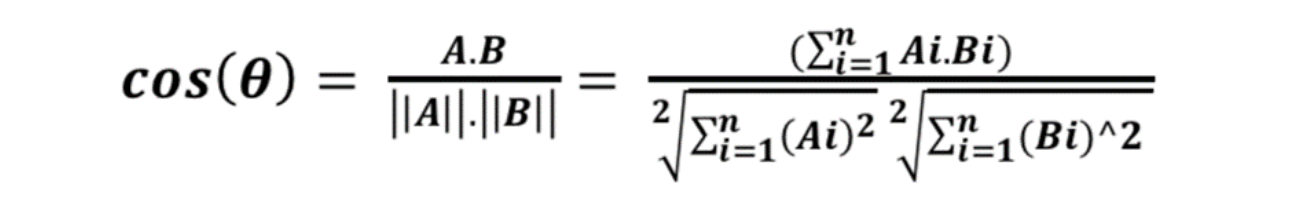

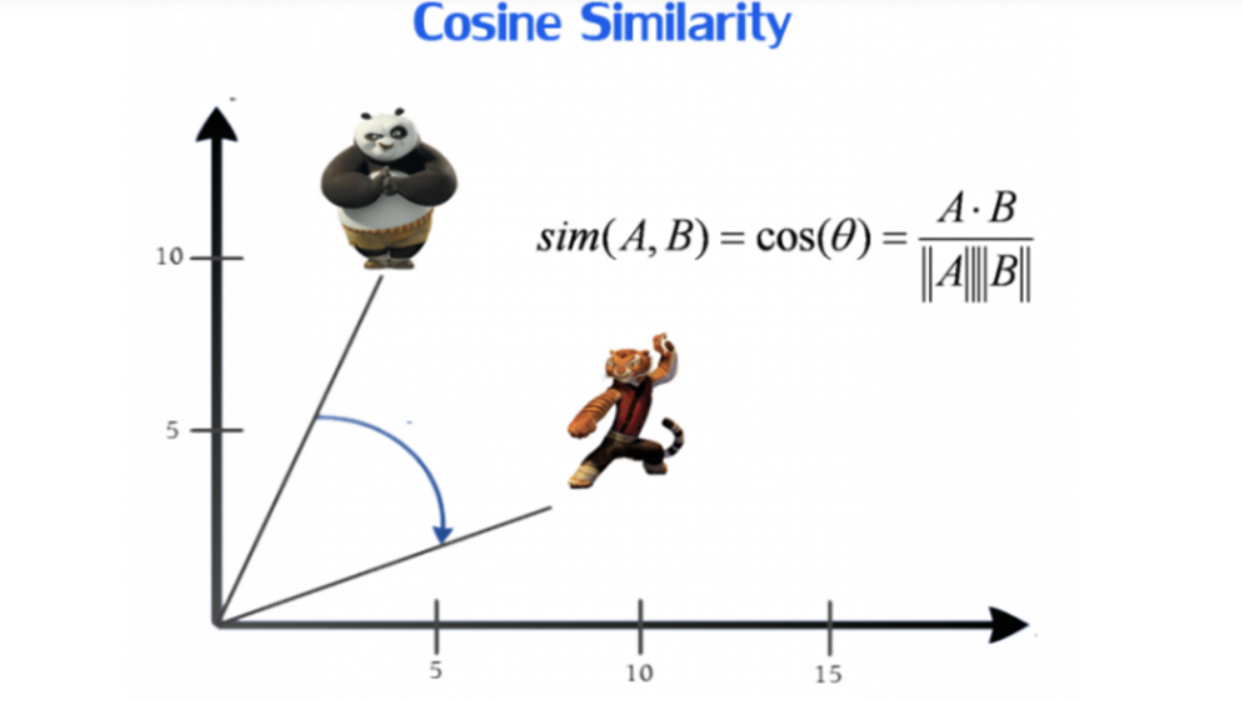

In [44]:
def item_based_recommender(title):
    
    book_title = str(title)
    if book_title in df['title'].values:
            
        user_book_df = df.pivot_table(index=['title'],
                                                    columns=['userid'],
                                                    values='rating').fillna(0)
        
        cosine_sim = cosine_similarity(user_book_df)
        index = np.where(user_book_df.index == book_title)[0][0]
        sim_books = list(enumerate(cosine_sim[index]))
        sorted_sim_books = sorted(sim_books,key=lambda x:x[1],
                                      reverse=True)[1:6]
            
        books = []
        for i in sorted_sim_books:
            books.append(user_book_df.index[i[0]])
        
        # Commenting out the image display code
        #fig = plt.figure(figsize=(18,5),dpi=100)
        #url = df.loc[df['title'] == book_title,'image_url_m'][:1].values[0]
        #im = Image.open(requests.get(url, stream=True).raw)
        #plt.imshow(im)
        #plt.axis('off')
        #plt.title('Rating: {}, \nAuthor: {}'\
        #               .format(round(df[df['title'] == book_title]['rating'].mean(),1),\
        #                       df['author'][df['title']== book_title].values[0]),\
        #                y=-0.20, color="black", fontsize=14, fontweight='bold', loc='left')
        #plt.show()
            
        print('Other books you may like:')
        for i in range(len(books)):
            print('{}, Author: {}'.format(books[i], df['author'][df['title']== books[i]].values[0]))
                
                     
    else:
        random = pd.Series(df['title'].unique()).sample(3).values
        print('Cant find book in dataset, please check spelling \n')
        print('Try: \n')
        print('{}'.format(random[0]),'\n')
        print('{}'.format(random[1]),'\n')
        print('{}'.format(random[2]),'\n')


In [45]:
item_based_recommender('1984')

Other books you may like:
LEcume Des Jours, Author: Boris Vian
La Petite Marchande de prose, Author: Daniel Pennac
Autant En Emporte Le Vent 3, Author: Margaret Mitchell
Autant en emporte le vent tome 1, Author: Margaret Mitchell
Autant en emporte le vent tome 2, Author: Margaret Mitchell


In [46]:
item_based_recommender('Final Fantasy Anthology Official Strategy Guide Brady Games')

Cant find book in dataset, please check spelling 

Try: 

Henri De ToulouseLautrec 18641901 The Theatre of Life Basic Art 

Autobiographie DUN Amour 

The Bridges of Madison County 



### User Based Collaborative Filtering 

def user_based_recommender(user_id):
    
#     user_id = int(user_id)
    if user_id in df['userid'].values:
            
        user_df = df.pivot_table(index=['userid'], columns=['title'],
                                                    values='rating').fillna(0)
        
        cosine_sim = cosine_similarity(user_df)
        user_sim_df = pd.DataFrame(cosine_sim)
        # Set the index and column name to user Ids
        user_sim_df.index = list(user_df.index)
        user_sim_df.columns = list(user_df.index)
        index = np.where(user_sim_df.index == user_id)[0][0]
        sim_books = list(enumerate(user_sim_df[user_sim_df.index[index]]))
        sorted_sim_books = sorted(sim_books,key=lambda x:x[1],
                                      reverse=True)[1:50]
            
        users = []
        for i in sorted_sim_books:
            users.append(user_sim_df.index[i[0]])
            
        book_list = []
        for i in users:
            book_list = book_list+list(df[df['userid']==i]['title'])
        
        final_books = sorted(set(book_list)-set(df[df['userid']==user_id]['title']))
        print("Top 5 Recommended books for User ID", user_id)
        print("---------------------------")
        for i, book in enumerate(final_books):
            print(i+1, ".", book) 
            
        # Commenting the following code block as it displays images
        # fig, axs = plt.subplots(3, 5,figsize=(20,20))
        # fig.suptitle('Recommendation for User ID: ' + str(user_id), size = 42, fontweight='bold')
        # for i in range(len(final_books[0:5])):
        #     url = df.loc[df['title'] == final_books[i],'image_url_m'][:1].values[0]
        #     im = Image.open(requests.get(url, stream=True).raw)
        #     axs[0,i].imshow(im)
        #     axs[0,i].axis("off")
        #     axs[0,i].set_title('Rating: {}, \nAuthor: {}'\
        #                .format(round(df[df['title'] == final_books[i]]['rating'].mean(),1),\
        #                        df['author'][df['title']== final_books[i]].values[0]),\
        #                 y=-0.15, color="black", fontsize=16, fontweight = 'bold', loc='left')
                
        #     fig.show()
        # for i in range(len(final_books[0:5])):
        #     url = df.loc[df['title'] == final_books[i+5],'image_url_m'][:1].values[0]
        #     im = Image.open(requests.get(url, stream=True).raw)
        #     axs[1,i].imshow(im)
        #     axs[1,i].axis("off")
        #     axs[1,i].set_title('Rating: {}, \nAuthor: {}'\
        #                .format(round(df[df['title'] == final_books[i+5]]['rating'].mean(),1),\
        #                        df['author'][df['title']== final_books[i+5]].values[0]),\
        #                 y=-0.15, color="black", fontsize=16, fontweight = 'bold', loc='left')
                
        #     fig.show()
        # for i in range(len(final_books[0:5])):
        #     url = df.loc[df['title'] == final_books[i+10],'image_url_m'][:1].values[0]
        #     im = Image.open(requests.get(url, stream=True).raw)
        #     axs[2,i].imshow(im)
        #     axs[2,i].axis("off")
        #    axs[2,i].set_title('Rating: {}, \nAuthor: {}'\
        #               .format(round(df[df['title'] == final_books[i+10]]['rating'].mean(),1),\
        #                       df['author'][df['title']== final_books[i+10]].values[0]),\
        #                y=-0.15, color="black", fontsize=16, fontweight = 'bold', loc='left')
                
        #    fig.show()
        #fig.tight_layout(pad = 2.0)
        #plt.show()
    else:
        random = pd.Series(df['title'].unique()).sample(3).values
        print('Cant find user in dataset, please check spelling \n')
        print('Try: \n')
        print('{}'.format(random[0]),'\n')
        print('{}'.format(random[1]),'\n')
        print('{}'.format(random[2]),'\n') 


In [47]:
def user_based_recommender(user_id):
    
    if user_id in df['userid'].values:
        user_df = df.pivot_table(index=['userid'], columns=['title'], values='rating').fillna(0)
        cosine_sim = cosine_similarity(user_df)
        user_sim_df = pd.DataFrame(cosine_sim)
        # Set the index and column name to user Ids
        user_sim_df.index = list(user_df.index)
        user_sim_df.columns = list(user_df.index)
        index = np.where(user_sim_df.index == user_id)[0][0]
        sim_books = list(enumerate(user_sim_df[user_sim_df.index[index]]))
        sorted_sim_books = sorted(sim_books,key=lambda x:x[1], reverse=True)[1:50]
        users = []
        for i in sorted_sim_books:
            users.append(user_sim_df.index[i[0]])
        book_list = []
        for i in users:
            book_list = book_list+list(df[df['userid']==i]['title'])
        final_books = sorted(set(book_list)-set(df[df['userid']==user_id]['title']))
        print("Top 5 Recommended books for User ID", user_id)
        print("---------------------------")
        for i, book in enumerate(final_books[:5]):
            print(i+1, ".", book)


In [48]:
user_based_recommender(3757)

Top 5 Recommended books for User ID 3757
---------------------------
1 .  A Nutshell handbook
2 .  Final Fantasy Anthology Official Strategy Guide Brady Games
3 .  Small g Eine Sommeridylle
4 . 09Nov
5 . 10 Things You Should Know About Dinosaurs 10 Things You Should Know series


In [49]:
user_based_recommender(12835)

Top 5 Recommended books for User ID 12835
---------------------------
1 .  A Nutshell handbook
2 . 09Nov
3 . 10 Things You Should Know About Dinosaurs 10 Things You Should Know series
4 . 100 Great Natural Remedies Using Healing Plants at Home
5 . 100 Things Im Not Going to Do Now That Im over 50


### Content-Based Collaborative Filterings
In this recommender system the content of the book (Author) is used to find its similarity with other books. Then the books that are most likely to be similar are recommended. 

### Author Based

In [50]:
def author_based_recommender(author_name):
    author_books = df[df['author'] == author_name]['title'].unique()
    author_ratings = df[df['title'].isin(author_books)].groupby('title')['rating'].mean().sort_values(ascending=False)
    top_books = author_ratings.index[:5]
    print("Top 5 Recommended books by", author_name)
    print("---------------------------")
    for i, book in enumerate(top_books):
        print(i+1, ".", book)


In [51]:
author_counts = df['author'].value_counts()
print(author_counts)

Stephen King           101
Nora Roberts            53
John Grisham            49
J. K. Rowling           48
Barbara Cartland        46
                      ... 
P.J. Owens               1
Harvest McCampbell       1
Leonard R.N. Ashley      1
Thomas Bartram           1
Artur Marcos             1
Name: author, Length: 6636, dtype: int64


In [52]:
author_based_recommender('Robert Fisher')

Top 5 Recommended books by Robert Fisher
---------------------------
1 . El caballero de la armadura oxidada


In [53]:
author_based_recommender('Stephen King')

Top 5 Recommended books by Stephen King
---------------------------
1 . Es
2 . Christine Roman
3 . Schlaflos Insomnia
4 . La Tour sombre tome 1  Le pistolero
5 . La tour sombre 2 Les trois cartes


### Comparison of All Recommenders

In [54]:
item_based_recommender('1984')

Other books you may like:
LEcume Des Jours, Author: Boris Vian
La Petite Marchande de prose, Author: Daniel Pennac
Autant En Emporte Le Vent 3, Author: Margaret Mitchell
Autant en emporte le vent tome 1, Author: Margaret Mitchell
Autant en emporte le vent tome 2, Author: Margaret Mitchell


In [55]:
book_title = '1984'
book_data = df[df['title'] == book_title]
author_name = book_data['author'].values[0]
user_ids = book_data['userid'].unique()

print("Author of '{}' book: {}".format(book_title, author_name))
print("User IDs that recommend '{}' book:".format(book_title))
print(user_ids)

Author of '1984' book: George Orwell
User IDs that recommend '1984' book:
[ 90232 125203]


In [56]:
author_based_recommender('George Orwell')

Top 5 Recommended books by George Orwell
---------------------------
1 . 1984
2 . Farm der Tiere Ein Mrchen
3 . Rebelion en la Granja
4 . La Ferme Des Animaux


In [57]:
user_based_recommender(90232)

Top 5 Recommended books for User ID 90232
---------------------------
1 .  A Nutshell handbook
2 .  Small g Eine Sommeridylle
3 . 09Nov
4 . 10 Things You Should Know About Dinosaurs 10 Things You Should Know series
5 . 100 Great Natural Remedies Using Healing Plants at Home


### Conclusion 
We create recommenders using demographic , content- based and collaborative filtering. While demographic filtering is very elemantary and cannot be used practically, Hybrid Systems can take advantage of content-based and collaborative filtering as the two approaches are proved to be almost complimentary. This model was very baseline and only provides a fundamental framework to start with.

I would like to mention some excellent refereces that I learned from